
# *Project Name*    - ***Rainfall Prediction in Australia***



##### **Project Type**    - Classification
##### **Contribution**    - Individual

### Problem Statement: -

Design a machine learning model to predict whether it will rain the next day in Australia. Using historical weather data, the model should accurately classify the target variable "RainTomorrow" (Yes/No) based on features such as temperature, humidity, wind speed, cloud cover, atmospheric pressure, and rainfall from the current day. The goal is to help improve weather forecasting accuracy, providing timely information for agricultural planning, daily activities, and safety measures.

### Key objectives include:

1. Handling missing data and ensuring data Equality.
2. Balancing the dataset if the target variable is imbalanced.
3. Evaluating model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
4. Fine-tuning the model for optimal performance and generalizability.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import * 
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\python.practice\dataset_practice\weatherAUS.csv")

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [4]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[5 rows x 24 columns]

## Exploratory Data Analysis and Visualization

In [5]:
df.shape

(142193, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

In [9]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
Evaporation       356
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64

## 1. Analysing Data

In [11]:
# visualization helps analyze the frequency of rainy days (RainToday) across different locations

px.histogram(df,x='Location', title='Location vs Rainy Days', color = 'RainToday')

In [12]:
# It helps identify how temperature at 3 PM influences rainfall the next day.
# If higher or lower temperatures correlate with rain and The distribution of Temp3pm for both rainy and non-rainy days.

px.histogram(df ,x='Temp3pm',title='Temprature at 3pm vs Rain Tomorrow',color='RainTomorrow')

In [13]:
#  helps analyze the relationship between today's rain (RainToday) and tomorrow's rain
# If it rained today, does it increase the chance of rain tomorrow? 

px.histogram(df,x= 'RainTomorrow', title='Rain Tomorrow vs Rain Today',color='RainToday')

In [14]:
# Shows the relationship between minimum and maximum temperatures 
# Helps determine how temperature variations impact rainfall occurrence.

px.scatter(df.sample(2000),title='Min Temp vs Max Temp', x ='MinTemp',y='MaxTemp',color='RainToday')

In [15]:
# Helps identify the relationship between temperature and humidity. 
# Shows whether higher or lower temperatures correlate with higher humidity.
# Helps analyze if specific temperature-humidity combinations are more likely to result in rain tomorrow (RainTomorrow=Yes).

px.strip(df.sample(2000),title="Temp (3pm) vs. Humidity (3pm)",x='Temp3pm',y='Humidity3pm',color='RainTomorrow')

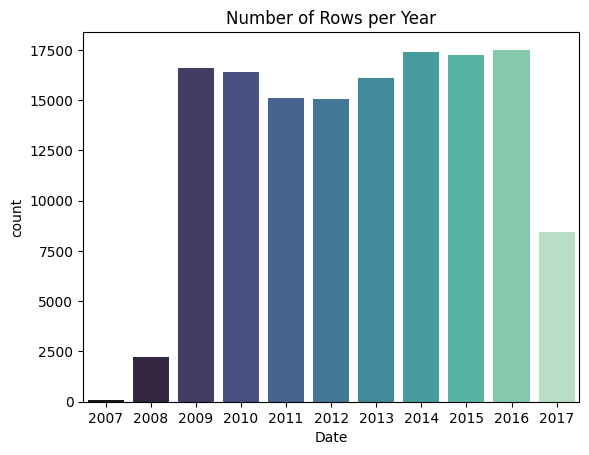

In [16]:
# Shows how many records are available for each year.
# Identifies missing data or years with fewer observations

plt.title('Number of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year,palette='mako')
plt.show()

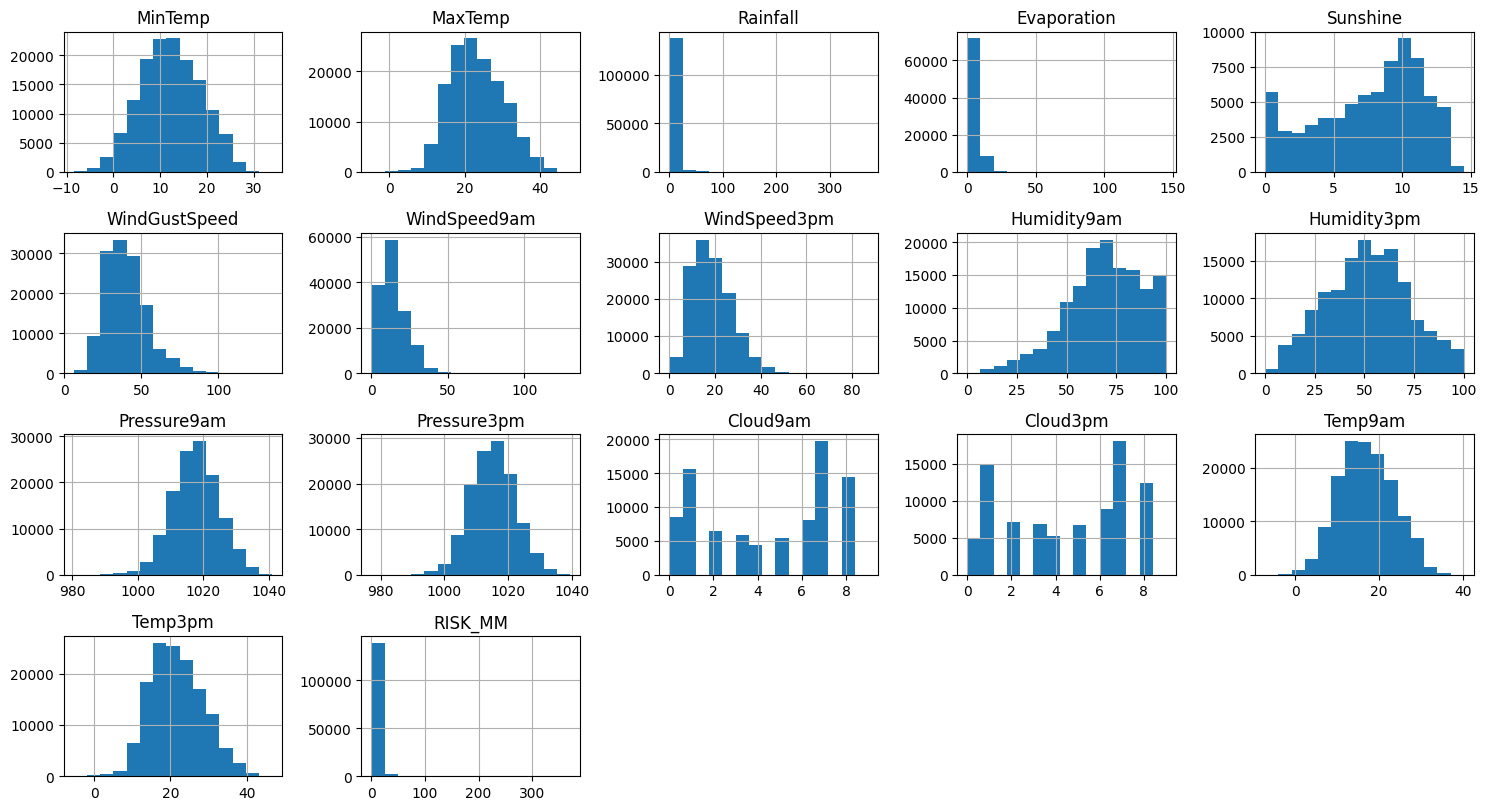

In [17]:
# Distribution Analysis:
# Ploting histograms and boxplots to understand the distribution of numerical variables and categorical variables.

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 12), layout=(6, 5))
plt.tight_layout()
plt.show()

## 2. Data Preprocessing

**Handling missing values is a crucial step in data preprocessing, especially when working with predictive modeling or machine learning tasks. Missing data can introduce bias, reduce the effectiveness of models, and lead to inaccurate predictions**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.drop(columns={'Date','RISK_MM'},axis=1,inplace=True)

In [21]:
df.isnull().sum()[df.isnull().sum()>0]

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

In [22]:
df.isnull().sum()[df.isnull().sum()>0] / df.shape[0] * 100

MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
dtype: float64

In [23]:
# Dropping the columns because they have a large number of null values and 
#  also have low correlation between the X variable and the target variable

df.drop(columns={'Evaporation','Sunshine','Cloud9am','Cloud3pm'},inplace=True)

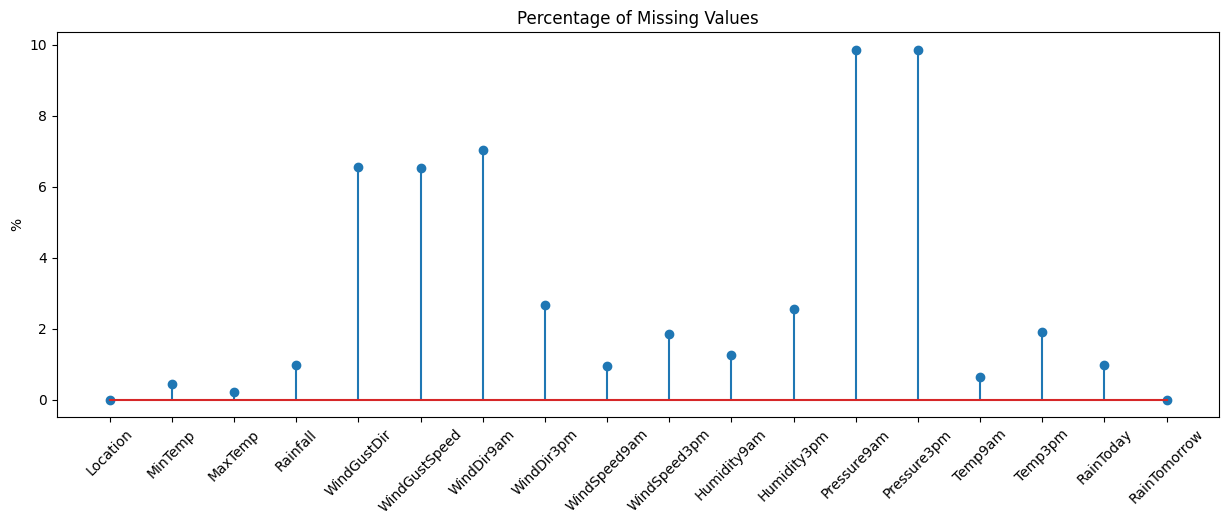

In [24]:
# Visualize the Null values

missing_values_per = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

In [25]:
# Droping null values of Target variable 

df.dropna(subset=['RainTomorrow'], inplace=True)

In [26]:
df.RainToday.value_counts()

RainToday
No     109332
Yes     31455
Name: count, dtype: int64

In [27]:
# Dealing with null values 

In [28]:
df.RainToday.fillna('No', inplace=True)
df.Rainfall.fillna(df.Rainfall.mean(), inplace=True)
df.WindGustDir.fillna("W",inplace=True)
df.WindGustSpeed.fillna(df.WindGustSpeed.mean(),inplace=True)
df.WindDir9am.fillna("N",inplace=True)
df.WindDir3pm.fillna("SE",inplace=True)
df.WindSpeed9am.fillna(df.WindSpeed9am.mean(),inplace=True)
df.WindSpeed3pm.fillna(df.WindSpeed3pm.mean(),inplace=True)
df.Humidity9am.fillna(df.Humidity9am.mean(),inplace=True)
df.Humidity3pm.fillna(df.Humidity3pm.mean(),inplace=True)
df.Pressure9am.fillna(df.Pressure9am.mean(),inplace=True)
df.Pressure3pm.fillna(df.Pressure3pm.mean(),inplace=True)
df.Temp9am.fillna(df.Temp9am.mean(),inplace=True)
df.Temp3pm.fillna(df.Temp3pm.mean(),inplace=True)
df.MinTemp.fillna(df.MinTemp.mean(),inplace=True)
df.MaxTemp.fillna(df.MaxTemp.mean(),inplace=True)

In [29]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

**Handling Categorical Data**

In [30]:
# iterates through all categorical columns in a DataFrame and
# prints the value counts

for i in df.dtypes.index[df.dtypes == 'object']:
    a = df[i].value_counts()
    print(f'column: {i}')
    print(a)
    print("****"*8)

column: Location
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929

In [31]:
df.select_dtypes(include='object').columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [32]:
df.Location.value_counts()

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [33]:
# Converting category data into numerical data using label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [35]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

## 3. Feature Selections

In [36]:
# For Feature selection we used two techniques
# 1. Correlation
# 2. boruta 

In [37]:
# 1. Correlation 

df.corr()

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  \
Location       1.000000 -0.006194 -0.020490 -0.003457    -0.005055   
MinTemp       -0.006194  1.000000  0.733919  0.103314    -0.136321   
MaxTemp       -0.020490  0.733919  1.000000 -0.074202    -0.212208   
Rainfall      -0.003457  0.103314 -0.074202  1.000000     0.044853   
WindGustDir   -0.005055 -0.136321 -0.212208  0.044853     1.000000   
WindGustSpeed  0.069269  0.173331  0.066329  0.127250     0.137648   
WindDir9am    -0.004434 -0.029635 -0.212589  0.085142     0.356896   
WindDir3pm     0.008325 -0.158958 -0.181344  0.047904     0.565814   
WindSpeed9am   0.077038  0.174946  0.014586  0.085977     0.009727   
WindSpeed3pm   0.064180  0.174187  0.050381  0.056762     0.083963   
Humidity9am   -0.002065 -0.232372 -0.499777  0.221392     0.067950   
Humidity3pm    0.011066  0.005913 -0.499725  0.249609     0.063939   
Pressure9am    0.036492 -0.424357 -0.309093 -0.159676    -0.120615   
Pressure3pm    0.046345 -0.434034 -0.397422 -0.120366    -0.031998   
Temp9am       -0.015596  0.897999  0.880087  0.011384    -0.178071   
Temp3pm       -0.022718  0.699828  0.969735 -0.077553    -0.223669   
RainToday     -0.004911  0.055645 -0.226474  0.500286     0.127651   
RainTomorrow  -0.003579  0.083717 -0.159087  0.236874     0.053447   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
Location            0.069269   -0.004434    0.008325      0.077038   
MinTemp             0.173331   -0.029635   -0.158958      0.174946   
MaxTemp             0.066329   -0.212589   -0.181344      0.014586   
Rainfall            0.127250    0.085142    0.047904      0.085977   
WindGustDir         0.137648    0.356896    0.565814      0.009727   
WindGustSpeed       1.000000    0.074660    0.136660      0.577864   
WindDir9am          0.074660    1.000000    0.301298      0.109955   
WindDir3pm          0.136660    0.301298    1.000000      0.050191   
WindSpeed9am        0.577864    0.109955    0.050191      1.000000   
WindSpeed3pm        0.658377    0.111090    0.089810      0.513079   
Humidity9am        -0.209272    0.088850    0.026074     -0.269027   
Humidity3pm        -0.025822    0.148903   -0.007186     -0.030991   
Pressure9am        -0.426600   -0.050318   -0.133629     -0.215178   
Pressure3pm        -0.384642    0.039878   -0.037495     -0.165050   
Temp9am             0.146756   -0.115635   -0.175855      0.128769   
Temp3pm             0.032274   -0.219980   -0.192927      0.005026   
RainToday           0.148244    0.168410    0.123130      0.100568   
RainTomorrow        0.225264    0.035776    0.030488      0.090524   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Location           0.064180    -0.002065     0.011066     0.036492   
MinTemp            0.174187    -0.232372     0.005913    -0.424357   
MaxTemp            0.050381    -0.499777    -0.499725    -0.309093   
Rainfall           0.056762     0.221392     0.249609    -0.159676   
WindGustDir        0.083963     0.067950     0.063939    -0.120615   
WindGustSpeed      0.658377    -0.209272    -0.025822    -0.426600   
WindDir9am         0.111090     0.088850     0.148903    -0.050318   
WindDir3pm         0.089810     0.026074    -0.007186    -0.133629   
WindSpeed9am       0.513079    -0.269027    -0.030991    -0.215178   
WindSpeed3pm       1.000000    -0.144270     0.015789    -0.277495   
Humidity9am       -0.144270     1.000000     0.659852     0.131601   
Humidity3pm        0.015789     0.659852     1.000000    -0.025769   
Pressure9am       -0.277495     0.131601    -0.025769     1.000000   
Pressure3pm       -0.239743     0.176168     0.048566     0.959878   
Temp9am            0.162144    -0.471137    -0.217593    -0.397763   
Temp3pm            0.028443    -0.492430    -0.555777    -0.266308   
RainToday          0.078357     0.348841     0.370556    -0.179226   
RainTomorrow       0.086909     0.255158     0.439678    -0.234027   

               Pressur

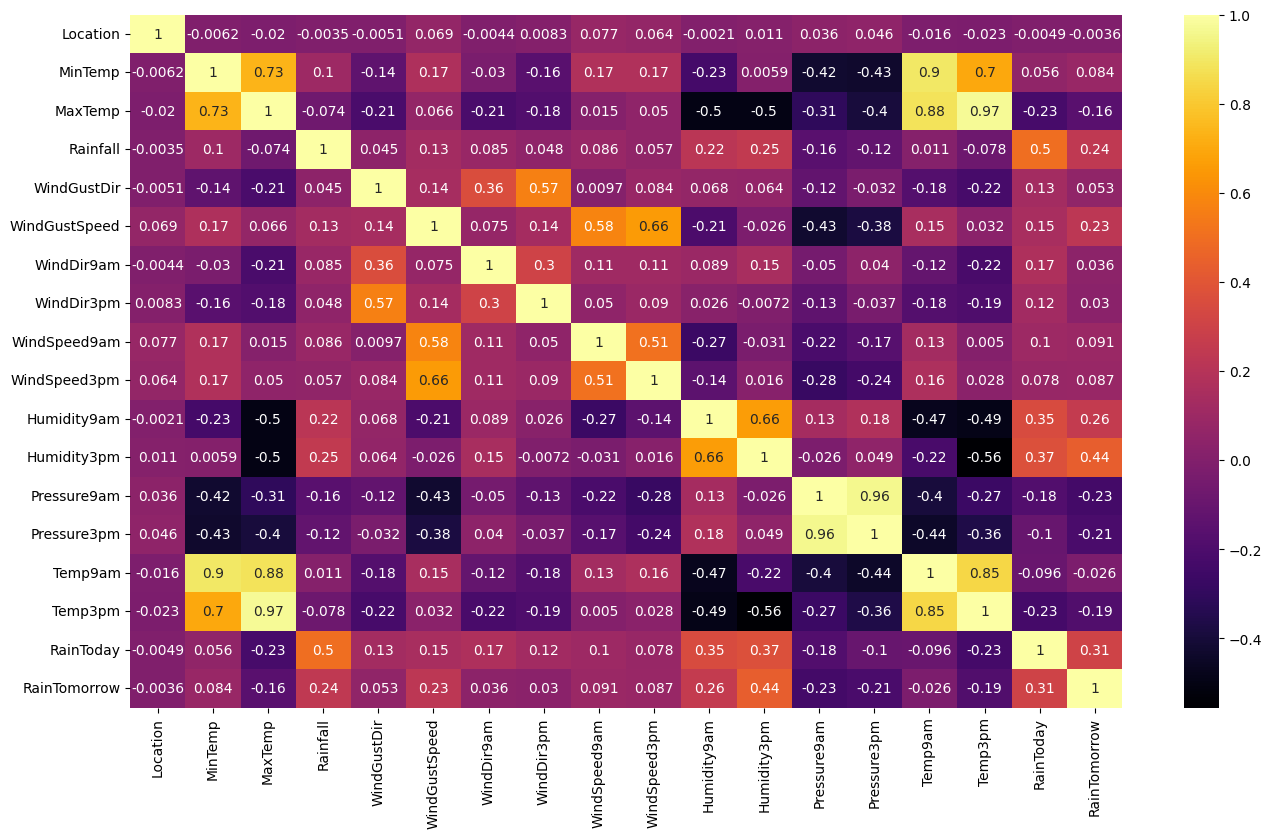

In [38]:
plt.figure(figsize =(16,9))
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')
plt.show()

In [39]:
# 2. Boruta method 

from boruta import BorutaPy

In [137]:
df.head(1)

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0         2     13.4     22.9       0.6           13           44.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          13          14          20.0          24.0         71.0   

   Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0         22.0       1007.7       1007.1     16.9     21.8          0   

   RainTomorrow  
0             0

In [138]:
# for Boruta we need to specify X and Y variable

x = df.iloc[:,0:-1]
y = df['RainTomorrow']

In [139]:
# taking copy of X variable

df_copy = x

In [140]:
# Boruta work on numpy array so coverting data
# because When we covert data into Numpy Array it work Fatser 

df_x = np.array(x)
df_y = np.array(y)

In [141]:
# in background the Boruta used random forest classification

from sklearn.ensemble import RandomForestClassifier
crf = RandomForestClassifier()

In [ ]:
bourta_features_selection = BorutaPy(crf,max_iter=10,verbose=2)
bourta_features_selection.fit(df_x, df_y)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	10
Tentative: 	1
Rejected: 	6
Iteration: 	9 / 10
Confirmed: 	10
Tentative: 	1
Rejected: 	6


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	10
Tentative: 	1
Rejected: 	6


BorutaPy(estimator=RandomForestClassifier(n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x1987E2C1340),
         max_iter=10, random_state=RandomState(MT19937) at 0x1987E2C1340,
         verbose=2)

In [ ]:
# this indicates the which x variable feature is important 
# if feature is important the value is true otherwise its false 

l1 = bourta_features_selection.support_

In [ ]:
feature_imp = pd.DataFrame()
feature_imp['feat'] = df_copy.columns
feature_imp['imp'] = l1
feature_imp = feature_imp.sort_values('imp',ascending=False)

In [ ]:
feature_imp

feat    imp
11    Humidity3pm   True
2         MaxTemp   True
3        Rainfall   True
15        Temp3pm   True
5   WindGustSpeed   True
14        Temp9am   True
13    Pressure3pm   True
1         MinTemp   True
12    Pressure9am   True
10    Humidity9am   True
0        Location  False
8    WindSpeed9am  False
9    WindSpeed3pm  False
7      WindDir3pm  False
6      WindDir9am  False
4     WindGustDir  False
16      RainToday  False

In [145]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [40]:
# Droping unimportant features 

df.drop(columns={'WindSpeed9am','WindSpeed3pm','WindDir3pm','WindDir9am','WindGustDir','RainToday'},inplace=True)

### Multi-Colinearity
**Variance Inflation Factor (VIF)**

In [41]:
x = df.iloc[:,0:-1]
y = df['RainTomorrow']

# for checking the multi Colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
Variance_Inflation_Factor = []

for i in range(0 ,x.shape[1]):
    Variance_Inflation_Factor.append(variance_inflation_factor(x.values,i))

In [43]:
vif_df = pd.DataFrame()
vif_df['Columns'] = x.columns
vif_df['Variance Inflation Factor'] = Variance_Inflation_Factor

vif_df

Columns  Variance Inflation Factor
0        Location                   3.808544
1         MinTemp                  35.644254
2         MaxTemp                 251.407196
3        Rainfall                   1.217494
4   WindGustSpeed                  11.845671
5     Humidity9am                  46.570191
6     Humidity3pm                  35.966602
7     Pressure9am              369050.832674
8     Pressure3pm              366902.129152
9         Temp9am                 138.341404
10        Temp3pm                 250.320085

In [44]:
# We droping column because thay are highly correlated with each other 

df.drop(columns={'Pressure9am','Temp9am','Temp3pm','Pressure3pm'},inplace=True)

In [45]:
x = df.iloc[:,0:-1]
y = df['RainTomorrow']

Variance_Inflation_Factor = []

for i in range(0 ,x.shape[1]):
    Variance_Inflation_Factor.append(variance_inflation_factor(x.values,i))

vif_df = pd.DataFrame()
vif_df['Columns'] = x.columns
vif_df['Variance Inflation Factor'] = Variance_Inflation_Factor

vif_df

Columns  Variance Inflation Factor
0       Location                   3.711584
1        MinTemp                  13.707098
2        MaxTemp                  24.134079
3       Rainfall                   1.188085
4  WindGustSpeed                   8.840183
5    Humidity9am                  23.888683
6    Humidity3pm                  18.886633

In [46]:
# wee managed the high correaltion using VIF 

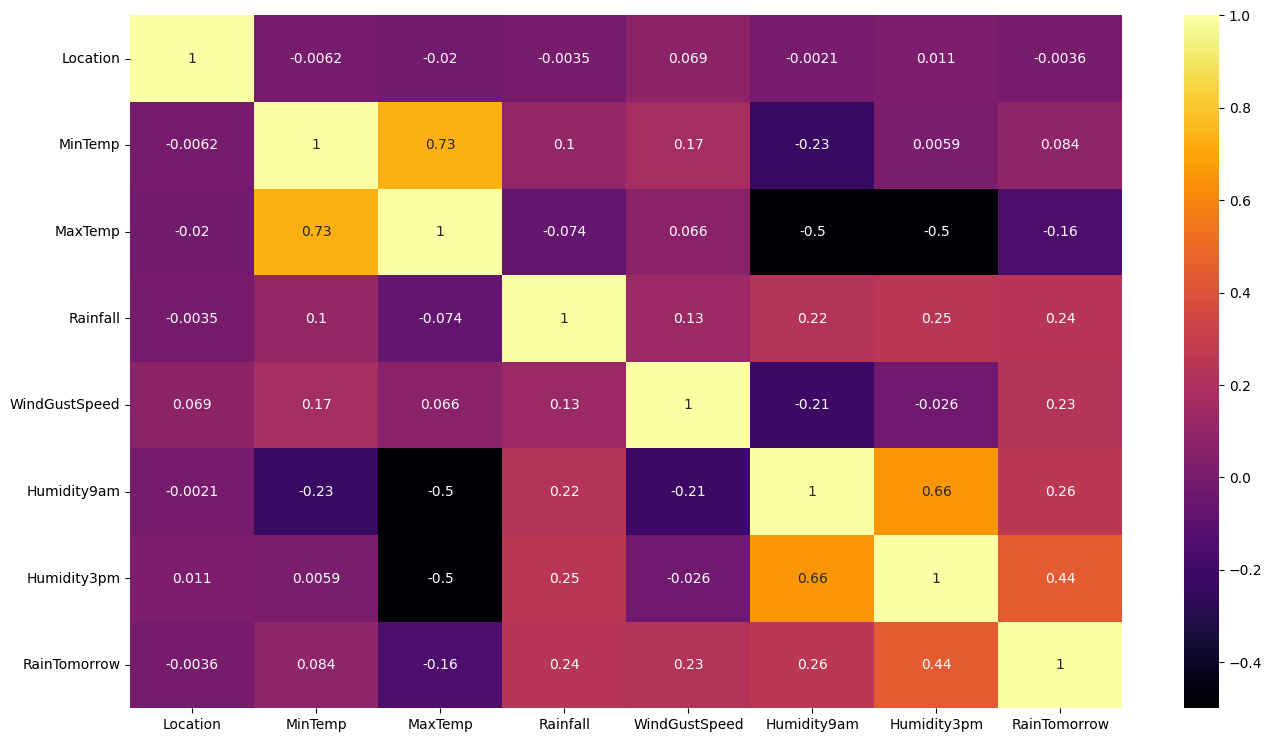

In [47]:
plt.figure(figsize =(16,9))
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')
plt.show()

## 4. Model Buliding

In [48]:
## Y variable or Target variable is ---> 'RainTomorrow'

df_train, df_test = train_test_split(df,test_size=0.25, random_state= 99)

**Handling Imbalanced Dataset**

In [49]:
# value count of target variable

df.RainTomorrow.value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

Text(0.5, 1.0, 'Showing Imbalanced data')

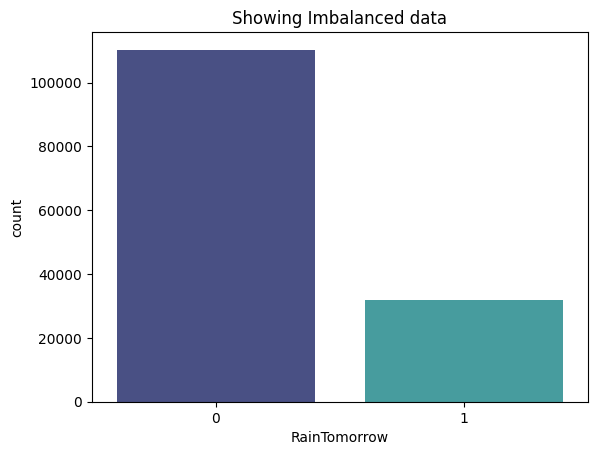

In [50]:
sns.countplot(x=df['RainTomorrow'], data=df, palette='mako')
plt.title('Showing Imbalanced data')

In [51]:
# Handling imbalanced dataset with SMOTE 

x =df.drop(['RainTomorrow'],axis=1)
y =df['RainTomorrow']

from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [52]:
x_new, y_new = sm.fit_resample(x, y.ravel())

print("Before Using SMOTE, counts of label '1': {}".format(sum(y == 1)))
print("Before Using SMOTE, counts of label '0': {} \n".format(sum(y == 0)))
print("After Using SMOTE, counts of label '1': {}".format(sum(y_new == 1)))
print("After Using SMOTE, counts of label '0': {} \n".format(sum(y_new == 0)))
print('\n')

Before Using SMOTE, counts of label '1': 31877
Before Using SMOTE, counts of label '0': 110316 

After Using SMOTE, counts of label '1': 110316
After Using SMOTE, counts of label '0': 110316 





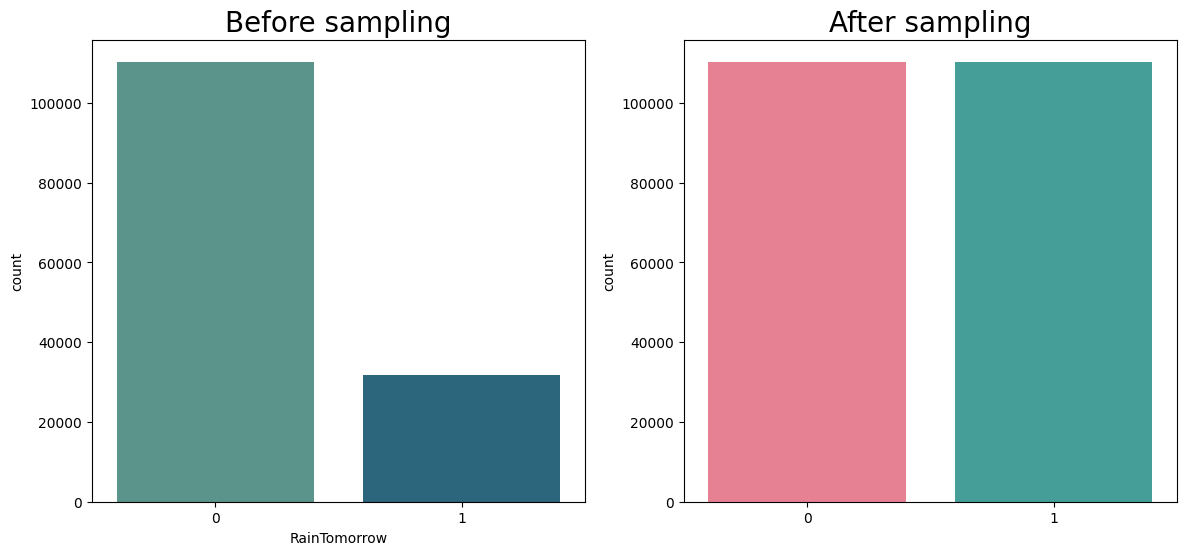

In [53]:
# Visualizing the balanced dataset

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.countplot(x=df['RainTomorrow'], data=df, palette='crest')
plt.title('Before sampling',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x= y_new,palette='husl')
plt.title('After sampling',fontsize=20)
plt.show()

In [54]:
# spilts the dataset into training (75%) and testing (25%) 

df_train_x,df_test_x ,df_train_y, df_test_y= train_test_split(x_new,y_new, test_size= 0.25 , random_state=101)

**Building Models**

We are going to use 7 models in this project for enhanced learning and selecting best model for dataset. As all them are not necessary but to evaluate their accuracy and possible predictive models. 7 models we will building are as follows: - 

1. Logistic Regression 
2. Decision Tree
3. Random Forest Classifier
4. KNN Model
5. AdaBoost
6. XGBoost
7. Gradient Boost 

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(df_train_x,df_train_y)

LogisticRegression()

In [ ]:
pred_test_logistic = logistic.predict(df_test_x)

confusion_matrix(df_test_y,pred_test_logistic)

array([[21073,  6361],
       [ 7236, 20488]], dtype=int64)

In [ ]:
acc_logistic = accuracy_score(df_test_y, pred_test_logistic)

print(classification_report(df_test_y,pred_test_logistic))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     27434
           1       0.76      0.74      0.75     27724

    accuracy                           0.75     55158
   macro avg       0.75      0.75      0.75     55158
weighted avg       0.75      0.75      0.75     55158



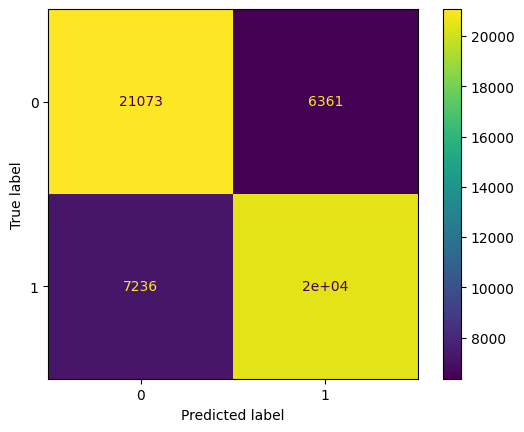

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_logistic))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

In [ ]:
pred_test_proba_logistic = logistic.predict_proba(df_test_x)[:,1]

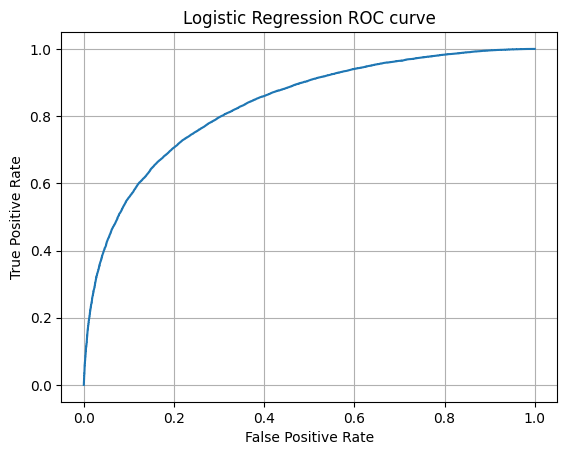

In [ ]:
# Fpr vs Tpr curve plot

fpr, tpr, _ = roc_curve(df_test_y, pred_test_proba_logistic)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.grid()
plt.show()

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an **overall accuracy of 75%**, meaning that it correctly classified 75% of the instances in the training set. **The precision for class 1 is 76%**, meaning that when the model predicted a class 1 Not good, it was correct 76% of the time. **The recall for class 1 is 74%**, meaning that the model correctly identified 74% of the actual class 1 instances in the dataset. **The F1-score for class 1 is 75%**.

#### **Hyperparameter Tuning for Logistic**

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

In [ ]:
# This performs 10-fold cross-validation on a logistic regression model and
#  prints the accuracy scores along with their mean.

Cv_score = cross_val_score(logistic,df_train_x,df_train_y, cv = 10,scoring = 'accuracy')
print("cv_score accuracy: ", Cv_score)
print('------'*9)
print("cv score mean accuracy: ", Cv_score.mean())

cv_score accuracy:  [0.75163162 0.75253807 0.75350496 0.75737249 0.75058923 0.75355049
 0.75590742 0.75620958 0.75687436 0.75862694]
------------------------------------------------------
cv score mean accuracy:  0.7546805158207796


In [ ]:
# hyperparameter tuning for a logistic regression model using GridSearchCV
# testing different values of C (regularization strength) with 5-fold cross-validation to find the best parameter.


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_logistic = GridSearchCV(logistic, param_grid, cv=5)

# Building Model
grid_logistic.fit(df_train_x , df_train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
pred_test_log_grid = grid_logistic.predict(df_test_x)
print(classification_report(df_test_y , pred_test_log_grid))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     27434
           1       0.76      0.74      0.75     27724

    accuracy                           0.75     55158
   macro avg       0.75      0.75      0.75     55158
weighted avg       0.75      0.75      0.75     55158



In [ ]:
print("Best cross-validation score:", grid_logistic.best_score_)
print("Best parameters:", grid_logistic.best_params_)

Best cross-validation score: 0.7546805128963137
Best parameters: {'C': 0.001}


**We did not see any improvement here.**

### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

dec.fit(df_train_x,df_train_y)

DecisionTreeClassifier()

In [ ]:
pred_test_decision = dec.predict(df_test_x)
conf_dec = confusion_matrix(df_test_y,pred_test_decision)
conf_dec

array([[22639,  4795],
       [ 4354, 23370]], dtype=int64)

In [ ]:
Accuarcy_dec = accuracy_score(df_test_y,pred_test_decision)
print(classification_report(df_test_y,pred_test_decision))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     27434
           1       0.83      0.84      0.84     27724

    accuracy                           0.83     55158
   macro avg       0.83      0.83      0.83     55158
weighted avg       0.83      0.83      0.83     55158



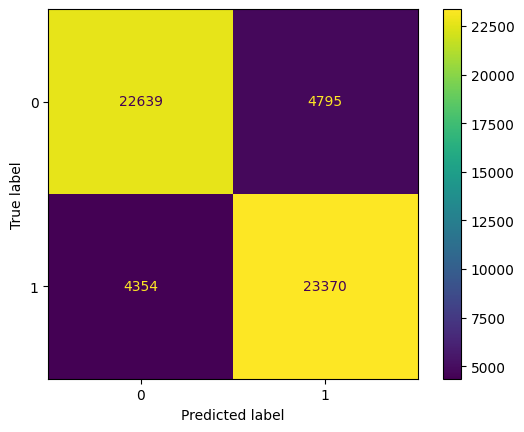

In [ ]:
c_matrix_decision = ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_decision))
c_matrix_decision.plot(cmap = plt.cm.viridis)
plt.show()

The ML model used is Decision Tree for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 83%**, which means that 83% of the predictions made by the model are correct. **The precision for class 1 is 83%**, which means that out of all the positive predictions made for class 1, 83% of them are actually correct. **The recall for class 1 is 84%**, which means that out of all the actual positive instances of class 1, the model correctly identified 84% of them. **The F1-score for class 1 is 84%**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

#### **Hyperparameter Tuning of Decision Tree**

In [ ]:
# hyperparameter tuning for a Decision Tree classifier using GridSearchCV,
#  optimizing criterion, max_depth and min_samples_split through an exhaustive search.

Decision_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20],
    'min_samples_split':[25,50,75,100]
}

grid = GridSearchCV(dec, Decision_grid)

grid.fit(df_train_x , df_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 20],
                         'min_samples_split': [25, 50, 75, 100]})

In [ ]:
grid_predict_decision = grid.predict(df_test_x)
confusion_matrix(df_test_y , grid_predict_decision)

array([[23712,  3722],
       [ 5258, 22466]], dtype=int64)

In [ ]:
print(classification_report(df_test_y,grid_predict_decision ))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     27434
           1       0.86      0.81      0.83     27724

    accuracy                           0.84     55158
   macro avg       0.84      0.84      0.84     55158
weighted avg       0.84      0.84      0.84     55158



**We did not see any improvement here.**

### 3. Random Forest Model

In [160]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier()

Random.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [161]:
pred_test_Random = Random.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_Random)

array([[24567,  2867],
       [ 3209, 24515]], dtype=int64)

In [162]:
acc_crf = accuracy_score(df_test_y, pred_test_Random)
print(classification_report(df_test_y , pred_test_Random))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     27434
           1       0.90      0.88      0.89     27724

    accuracy                           0.89     55158
   macro avg       0.89      0.89      0.89     55158
weighted avg       0.89      0.89      0.89     55158



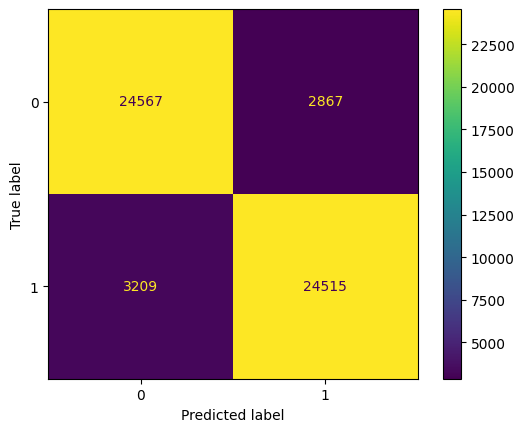

In [163]:
c_matrix_random = ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_Random))
c_matrix_random.plot(cmap = plt.cm.viridis)
plt.show()

The ML model used is Random Forest for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 89%**, which means that 89 % of the predictions made by the model are correct. **The precision for class 1 is 90%**, which means that out of all the positive predictions made for class 1, 90 % of them are actually correct. **The recall for class 1 is 88%**, which means that out of all the actual positive instances of class 1, the model correctly identified 88 % of them. **The F1-score for class 1 is 89%**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.


#### **Hyperparameter Tuning of Rnadom Forest**

In [ ]:
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clsr.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
pred_test_Random_hyper = clsr.predict(df_test_x)

confusion_matrix(df_test_y , pred_test_Random_hyper)

array([[22461,  4973],
       [ 6604, 21120]], dtype=int64)

In [ ]:
print(classification_report(df_test_y , pred_test_Random_hyper))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80     27434
           1       0.81      0.76      0.78     27724

    accuracy                           0.79     55158
   macro avg       0.79      0.79      0.79     55158
weighted avg       0.79      0.79      0.79     55158



*We saying after Hyperparameter Tuning of Rnadom Forest model that model performing poor performance comparing the without hyperparameter*

### 4. K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# The goal is to determine the optimal k value by analyzing the error trend.

error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(df_train_x,df_train_y)
    y_pred_test_knn = knn.predict(df_test_x)
    error_rate.append(1 - accuracy_score(df_test_y,y_pred_test_knn))

In [ ]:
error_rate

[0.12389861851408679,
 0.134359476413213,
 0.15499111642916708,
 0.15602451140360418,
 0.17139852786540488,
 0.1713622683926176,
 0.18010080133434858,
 0.18097102868124293,
 0.18854925849378146,
 0.18954639399543127,
 0.19409695783023317,
 0.19407882809383947,
 0.19757786721781068,
 0.19841183509191773,
 0.20153014975162264,
 0.20247289604409147,
 0.2048116320388702,
 0.2047572428296892,
 0.2072772761884042,
 0.20907212009137388,
 0.21034120163892822,
 0.2110482613582798,
 0.21242612132419592,
 0.21327821893469667,
 0.21447478153667643,
 0.21507306283766636,
 0.21581638202980524,
 0.2159432901845607,
 0.2169948148953914]

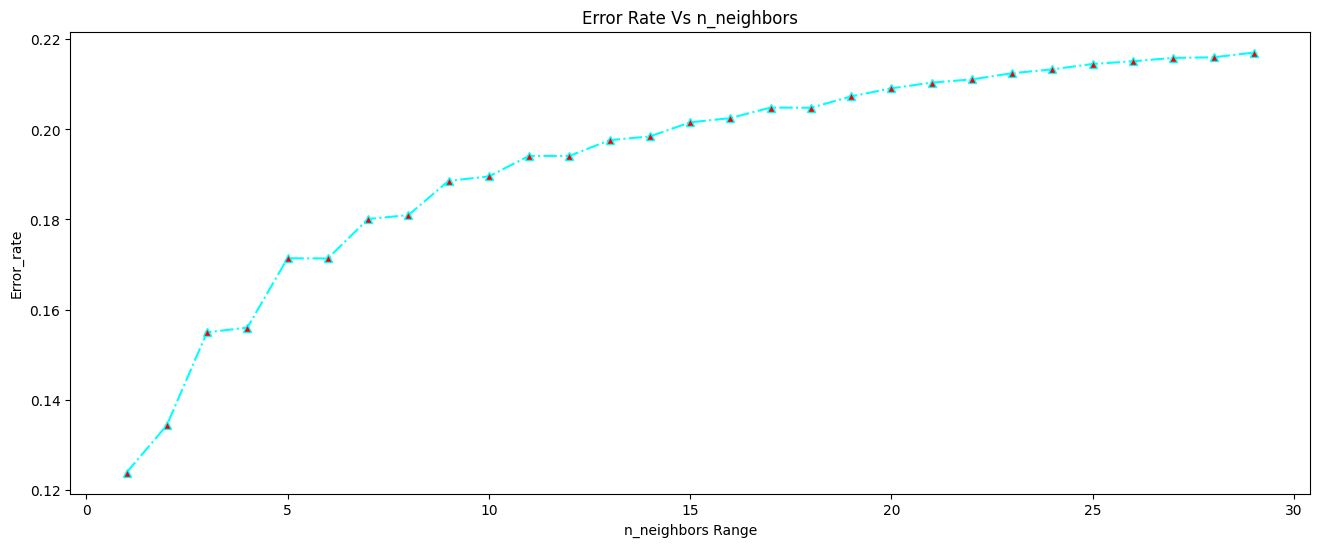

In [ ]:
# Let's Visualize all error Rates

plt.figure(figsize=(16,6))
plt.plot(range(1,30),error_rate, color='cyan', marker = '^', linestyle = '-.', markerfacecolor = 'red' )
plt.title("Error Rate Vs n_neighbors")
plt.xlabel("n_neighbors Range")
plt.ylabel("Error_rate")
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [ ]:
pred_test_knn = knn.predict(df_test_x)
conf_knn = confusion_matrix(df_test_y , pred_test_knn)
conf_knn

array([[20313,  7121],
       [ 2333, 25391]], dtype=int64)

In [ ]:
acc_knn = accuracy_score(df_test_y, pred_test_knn)
print(classification_report(df_test_y, pred_test_knn))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81     27434
           1       0.78      0.92      0.84     27724

    accuracy                           0.83     55158
   macro avg       0.84      0.83      0.83     55158
weighted avg       0.84      0.83      0.83     55158



The ML model used is K-Nearest Neighbors for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 83%**, which means that 83% of the predictions made by the model are correct. **The precision for class 1 is 78%**, which means that out of all the positive predictions made for class 1, 78 % of them are actually correct. **The recall for class 1 is 92%**, which means that out of all the actual positive instances of class 1, the model correctly identified 92 % of them. **The F1-score for class 1 is 84%**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

### 5. AdaBoost

**AdaBoost for Decision Tree model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(dec)

ada.fit(df_train_x, df_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [ ]:
pred_test_ada = ada.predict(df_test_x)

confusion_matrix(df_test_y, pred_test_ada)

array([[22641,  4793],
       [ 4500, 23224]], dtype=int64)

In [ ]:
acc_ada = accuracy_score(df_test_y, pred_test_ada)
print(classification_report(df_test_y , pred_test_ada))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     27434
           1       0.83      0.84      0.83     27724

    accuracy                           0.83     55158
   macro avg       0.83      0.83      0.83     55158
weighted avg       0.83      0.83      0.83     55158



### 6. XGBoost Model

In [169]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(df_train_x,df_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [170]:
pred_test_Xgboost = xgb.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_Xgboost)

array([[24985,  2449],
       [ 4564, 23160]], dtype=int64)

In [171]:
acc_xgboost = accuracy_score(df_test_y, pred_test_Xgboost)
print(classification_report(df_test_y , pred_test_Xgboost))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     27434
           1       0.90      0.84      0.87     27724

    accuracy                           0.87     55158
   macro avg       0.87      0.87      0.87     55158
weighted avg       0.88      0.87      0.87     55158



The ML model used is XGBoost for classifier. From the evaluation metric score chart, we can see that the model has an **accuracy of 87%**, which means that 87% of the predictions made by the model are correct. **The precision for class 1 is 91%**, which means that out of all the positive predictions made for class 1, 91 % of them are actually correct. **The recall for class 1 is 83**, which means that out of all the actual positive instances of class 1, the model correctly identified 83 % of them. **The F1-score for class 1 is 87**, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

### 7. Gradient Boost Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grd = GradientBoostingClassifier()

grd.fit(df_train_x,df_train_y)

GradientBoostingClassifier()

In [ ]:
pred_grd = grd.predict(df_test_x)
confusion_matrix(df_test_y,pred_grd)

array([[22782,  4652],
       [ 5667, 22057]], dtype=int64)

In [ ]:
acc_grd = accuracy_score(df_test_y, pred_grd)
print(classification_report(df_test_y, pred_grd))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     27434
           1       0.83      0.80      0.81     27724

    accuracy                           0.81     55158
   macro avg       0.81      0.81      0.81     55158
weighted avg       0.81      0.81      0.81     55158



## Final Model

In [ ]:
list_final_model = ['logistic', 'decision Tree','Random','ada boost', 'xg boost','knn','Gradient Boost']


list_final_acc_test_model  = [acc_logistic, Accuarcy_dec, acc_crf, acc_ada, acc_xgboost, acc_knn,acc_grd]


df_test_accuracy_final_allmodel = pd.DataFrame({'Method Used':list_final_model, "Accuracy": list_final_acc_test_model})

In [ ]:
figure = px.bar(df_test_accuracy_final_allmodel,x = 'Method Used', y = 'Accuracy', text = 'Accuracy', 
                labels = { 'Accuracy':'Accuracy'}, title = 'Final Model - Method Used vs Accuracy')
figure.update_layout(xaxis_tickangle = -60)
figure.show()

# ***Conclusion***

In our analysis, we initially performed EDA on all the features of our datset. We first analysed our dependent variable i.e, 'RainTomorrow' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We then later label Encoder the categorical variables.

Next we implemented 7 machine learning algorithms Logistic Regression, Random Forest , Decision Tree, KNN, Ada boost,XG boost and Gradient Boost . We did some hyperparameter tuning to improve our model performance.

Out of all above models Random forest Classifier gives the highest Accuracy of 89 % and F1-Score 89 % for test Set.
No overfitting is seen.
<br>

**After analyzing the Australian weather dataset for Rain Prediction, the Random Forest model has emerged as the best-performing algorithm. It effectively captures complex relationships between various weather features such as humidity, rainfall, and pressure, providing high accuracy in predicting whether it will rain the next day. The model's ability to handle missing data and non-linear interactions, along with its robustness to overfitting, makes it a reliable choice for this task. By optimizing key parameters, the Random Forest model ensures precise and consistent weather predictions, helping to inform daily decision-making.**

# ***Model Export***

In [ ]:
import sklearn
sklearn.__version__

'1.5.1'

In [ ]:
import pickle

In [ ]:
pickle.dump(Random,open(r'D:\Capstone_project_2\model.pkl','wb'))